In [1]:
!pip install bs4
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes

     |████████████████████████████████| 102kB 7.3MB/s ta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6

In [78]:
# Importing important librarries

In [161]:
import pandas as pd 
import numpy as np 
import requests
import urllib.request
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import folium

In [162]:
#function to make request and BeautifulSoup object for scraping 

def make_soup(url):
    req = urllib.request.urlopen(url)
    soup_build = BeautifulSoup(req)
    return soup_build

* Prepare obesity data

In [163]:
df = pd.read_csv('data.csv')

In [164]:
df

,name,obesityRate,bmi,pop2019
0,American Samoa,0.746,34.9000,55.312
1,Tokelau,0.744,,1.340
2,Nauru,0.610,32.5000,10.756
3,Cook Islands,0.559,33,17.548
4,Palau,0.553,29.4000,18.008
5,Marshall Islands,0.529,29.2000,58.791
6,Tuvalu,0.516,29.3000,11.646
7,Niue,0.500,,1.615
8,Tonga,0.482,31.9000,104.494
9,Samoa,0.473,31.7000,197.097


In [165]:
df.rename(columns={'name':'Country', 'obesityRate': 'Obesity_Rate', 'bmi':'BMI', 'pop2019':'Population'}, inplace=True)

In [166]:
df.dtypes

Country          object
Obesity_Rate    float64
BMI              object
Population      float64
dtype: object

In [167]:
soup = make_soup('https://developers.google.com/public-data/docs/canonical/countries_csv')

In [168]:
headers = []
for i in soup.find_all('th'):
    headers.append(i.text)

In [169]:
data = []
for i in soup.find_all('td'):
    data.append(i.text)

In [170]:
country = []
lat = []
long = []
for i in range(1,980,4):
    lat.append(data[i])
    i += 1
for i in range(2,980,4):
    long.append(data[i])
    i += 1
for i in range(3,980,4):
    country.append(data[i])
    i += 1

In [171]:
country

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Netherlands Antilles',
 'Angola',
 'Antarctica',
 'Argentina',
 'American Samoa',
 'Austria',
 'Australia',
 'Aruba',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Bermuda',
 'Brunei',
 'Bolivia',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Cocos [Keeling] Islands',
 'Congo [DRC]',
 'Central African Republic',
 'Congo [Republic]',
 'Switzerland',
 "Côte d'Ivoire",
 'Cook Islands',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Cape Verde',
 'Christmas Island',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Western Sahara',
 'Eritrea',
 'Spain',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland 

In [172]:
dict_countries = {'Country' : country,
           'lattitude' : lat,
           'longitude' : long
          }

In [173]:
df_countries = pd.DataFrame(dict_countries)

In [174]:
address = []
for i in df.Country:
    address.append(i)
address

['American Samoa',
 'Tokelau',
 'Nauru',
 'Cook Islands',
 'Palau',
 'Marshall Islands',
 'Tuvalu',
 'Niue',
 'Tonga',
 'Samoa',
 'Kiribati',
 'Micronesia',
 'Aruba',
 'Kuwait',
 'Cayman Islands',
 'United States',
 'British Virgin Islands',
 'Jordan',
 'Saudi Arabia',
 'Qatar',
 'Bermuda',
 'Guam',
 'French Polynesia',
 'Puerto Rico',
 'United States Virgin Islands',
 'Libya',
 'Turkey',
 'Egypt',
 'Lebanon',
 'United Arab Emirates',
 'Bahamas',
 'New Caledonia',
 'New Zealand',
 'Iraq',
 'Fiji',
 'Macau',
 'Hong Kong',
 'Bahrain',
 'Canada',
 'Northern Mariana Islands',
 'Australia',
 'Mexico',
 'Malta',
 'South Africa',
 'Argentina',
 'Chile',
 'Uruguay',
 'Dominica',
 'United Kingdom',
 'Syria',
 'Dominican Republic',
 'Algeria',
 'Oman',
 'Tunisia',
 'Palestine',
 'Suriname',
 'Hungary',
 'Lithuania',
 'Morocco',
 'Israel',
 'Czech Republic',
 'Iran',
 'Costa Rica',
 'Venezuela',
 'Andorra',
 'Ireland',
 'Vanuatu',
 'Bulgaria',
 'Greece',
 'Jamaica',
 'El Salvador',
 'Cuba',
 'Bel

In [175]:
df_countries

,Country,lattitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.93911,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615
5,Albania,41.153332,20.168331
6,Armenia,40.069099,45.038189
7,Netherlands Antilles,12.226079,-69.060087
8,Angola,-11.202692,17.873887
9,Antarctica,-75.250973,-0.071389


In [176]:
df = pd.merge(df, df_countries, on='Country')

In [177]:
df

,Country,Obesity_Rate,BMI,Population,lattitude,longitude
0,American Samoa,0.746,34.9000,55.312,-14.270972,-170.132217
1,Tokelau,0.744,,1.340,-8.967363,-171.855881
2,Nauru,0.610,32.5000,10.756,-0.522778,166.931503
3,Cook Islands,0.559,33,17.548,-21.236736,-159.777671
4,Palau,0.553,29.4000,18.008,7.51498,134.58252
5,Marshall Islands,0.529,29.2000,58.791,7.131474,171.184478
6,Tuvalu,0.516,29.3000,11.646,-7.109535,177.64933
7,Niue,0.500,,1.615,-19.054445,-169.867233
8,Tonga,0.482,31.9000,104.494,-21.178986,-175.198242
9,Samoa,0.473,31.7000,197.097,-13.759029,-172.104629


# Collect restaurants data

### Scraping for subway 

In [178]:
soup1 = make_soup('http://chartsbin.com/view/e4b')

In [179]:
soup1.find_all('td', {'class':'cname'})

[<td class="cname">Country name</td>,
 <td class="cname">United States</td>,
 <td class="cname">Canada</td>,
 <td class="cname">United Kingdom</td>,
 <td class="cname">Australia</td>,
 <td class="cname">Germany</td>,
 <td class="cname">Brazil</td>,
 <td class="cname">Mexico</td>,
 <td class="cname">New Zealand</td>,
 <td class="cname">France</td>,
 <td class="cname">Puerto Rico</td>,
 <td class="cname">China</td>,
 <td class="cname">Japan</td>,
 <td class="cname">India</td>,
 <td class="cname">Venezuela</td>,
 <td class="cname">Russian Federation</td>,
 <td class="cname">Taiwan</td>,
 <td class="cname">Ireland</td>,
 <td class="cname">United Arab Emirates</td>,
 <td class="cname">Netherlands</td>,
 <td class="cname">Singapore</td>,
 <td class="cname">Finland</td>,
 <td class="cname">Sweden</td>,
 <td class="cname">Malaysia</td>,
 <td class="cname">Kuwait</td>,
 <td class="cname">Saudi Arabia</td>,
 <td class="cname">South Korea</td>,
 <td class="cname">Costa Rica</td>,
 <td class="cnam

In [180]:
subway_countries = []
for i in soup1.find_all('td', {'class':'cname'}):
    subway_countries.append(i.text)
subway_countries

['Country name',
 'United States',
 'Canada',
 'United Kingdom',
 'Australia',
 'Germany',
 'Brazil',
 'Mexico',
 'New Zealand',
 'France',
 'Puerto Rico',
 'China',
 'Japan',
 'India',
 'Venezuela',
 'Russian Federation',
 'Taiwan',
 'Ireland',
 'United Arab Emirates',
 'Netherlands',
 'Singapore',
 'Finland',
 'Sweden',
 'Malaysia',
 'Kuwait',
 'Saudi Arabia',
 'South Korea',
 'Costa Rica',
 'Panama',
 'Trinidad and Tobago',
 'Poland',
 'Spain',
 'Thailand',
 'Guatemala',
 'El Salvador',
 'Pakistan',
 'Belgium',
 'Honduras',
 'Iceland',
 'Chile',
 'Hong Kong',
 'Colombia',
 'Hungary',
 'Qatar',
 'Philippines',
 'Guam',
 'Iraq',
 'Netherlands Antilles',
 'South Africa',
 'Argentina',
 'Bulgaria',
 'Czech Republic',
 'Jordan',
 'Turkey',
 'Bahrain',
 'Nicaragua',
 'Norway',
 'Italy',
 'Virgin Islands, U.s.',
 'Bahamas',
 'Denmark',
 'Bolivia',
 'Oman',
 'Slovakia',
 'Aruba',
 'Switzerland',
 'Austria',
 'Cayman Islands',
 'Egypt',
 'Lebanon',
 'Luxembourg',
 'Tanzania',
 'Zambia',
 'An

In [181]:
subway_count = []
for i in soup1.find_all('td', {'class':'tvalue tnumber'}):
    subway_count.append(i.text)
subway_count

['No of Locations',
 '23,750',
 '2,563',
 '1,402',
 '1,229',
 '739',
 '502',
 '484',
 '221',
 '218',
 '212',
 '188',
 '187',
 '179',
 '155',
 '139',
 '111',
 '105',
 '97',
 '86',
 '82',
 '81',
 '73',
 '51',
 '41',
 '41',
 '39',
 '35',
 '34',
 '34',
 '33',
 '33',
 '33',
 '32',
 '27',
 '27',
 '18',
 '18',
 '18',
 '17',
 '17',
 '15',
 '15',
 '15',
 '14',
 '13',
 '13',
 '13',
 '13',
 '12',
 '11',
 '11',
 '11',
 '11',
 '10',
 '10',
 '10',
 '9',
 '9',
 '8',
 '8',
 '7',
 '7',
 '7',
 '6',
 '6',
 '5',
 '5',
 '4',
 '4',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1']

In [182]:
k=1
for i in subway_countries:
    k += 1
print(k)

96


In [183]:
del subway_countries[-1]
del subway_countries[0]
del subway_count[0]


In [184]:
subway_dic = {'Country' : subway_countries,
              'count_subway_stores' : subway_count
             }
df_subway = pd.DataFrame(subway_dic)

In [185]:
df_subway

,Country,count_subway_stores
0,United States,"23,750"
1,Canada,"2,563"
2,United Kingdom,"1,402"
3,Australia,"1,229"
4,Germany,739
5,Brazil,502
6,Mexico,484
7,New Zealand,221
8,France,218
9,Puerto Rico,212


### Scraping for KFC 

In [186]:
soup2 = make_soup('http://chartsbin.com/view/30906')

In [187]:
data_KFC = []
for i in soup2.find_all('td'):
    data_KFC.append(i.text)

In [188]:
data_KFC

['ARG',
 'Argentina',
 '1',
 'ATG',
 'Antigua',
 '3',
 'ABW',
 'Aruba',
 '4',
 'BHS',
 'The Bahamas',
 '14',
 'BRB',
 'Barbados',
 '13',
 'BOL',
 'Bolivia',
 '',
 'BES',
 'Bonaire',
 '1',
 'BRA',
 'Brazil',
 '21',
 'CAN',
 'Canada',
 '663',
 'CHL',
 'Chile',
 '53',
 'COL',
 'Colombia',
 '29',
 'CRI',
 'Costa Rica',
 '32',
 'CUB',
 'Cuba',
 '',
 'CUW',
 'Curacao',
 '7',
 'DMA',
 'Dominica',
 '1',
 'DOM',
 'Dominican Republic',
 '13',
 'ECU',
 'Ecuador',
 '104',
 'SLV',
 'El Salvador',
 '8',
 'GUF',
 'French Guiana',
 '',
 'CYM',
 'Grand Cayman',
 '3',
 'GRD',
 'Grenada',
 '4',
 'GLP',
 'Guadeloupe',
 '4',
 'GTM',
 'Guatemala',
 '3',
 'GUY',
 'Guyana',
 '4',
 'HND',
 'Honduras',
 '13',
 'JAM',
 'Jamaica',
 '33',
 'MTQ',
 'Martinique',
 '1',
 'MEX',
 'Mexico',
 '302',
 'NIC',
 'Nicaragua',
 '',
 'PAN',
 'Panama',
 '30',
 'PRY',
 'Paraguay',
 '12',
 'PER',
 'Peru',
 '92',
 'PRI',
 'Puerto Rico',
 '92',
 'KNA',
 'St Kitts',
 '1',
 'LCA',
 'St Lucia',
 '3',
 'SXM',
 'St Maarten',
 '3',
 'VCT

In [189]:
KFC_countries = []
KFC_count = []
k = 1
for i in data_KFC:
    k += 1
print(k)

451


In [190]:
for i in range(1,451,3):
    KFC_countries.append(data_KFC[i])
for i in range(2,451,3):
    KFC_count.append(data_KFC[i])

In [191]:
KFC_dic = {
    'Country' : KFC_countries,
    'count_KFC_stores' : KFC_count
}

df_KFC = pd.DataFrame(KFC_dic)

In [192]:
df_KFC.head(20)

,Country,count_KFC_stores
0,Argentina,1
1,Antigua,3
2,Aruba,4
3,The Bahamas,14
4,Barbados,13
5,Bolivia,
6,Bonaire,1
7,Brazil,21
8,Canada,663
9,Chile,53


### Scraping for McDonald's 

In [193]:
Mc_soup = make_soup('http://chartsbin.com/view/30904')

In [194]:
data_Mc =[]
for i in Mc_soup.find_all('td'):
    data_Mc.append(i.text)
data_Mc

['ARG',
 'Argentina',
 '218',
 'ATG',
 'Antigua',
 '',
 'ABW',
 'Aruba',
 '3',
 'BHS',
 'The Bahamas',
 '',
 'BRB',
 'Barbados',
 '',
 'BOL',
 'Bolivia',
 '',
 'BES',
 'Bonaire',
 '',
 'BRA',
 'Brazil',
 '812',
 'CAN',
 'Canada',
 '1,427',
 'CHL',
 'Chile',
 '78',
 'COL',
 'Colombia',
 '81',
 'CRI',
 'Costa Rica',
 '54',
 'CUB',
 'Cuba',
 '1',
 'CUW',
 'Curacao',
 '5',
 'DMA',
 'Dominica',
 '',
 'DOM',
 'Dominican Republic',
 '9',
 'ECU',
 'Ecuador',
 '23',
 'SLV',
 'El Salvador',
 '13',
 'GUF',
 'French Guiana',
 '2',
 'CYM',
 'Grand Cayman',
 '',
 'GRD',
 'Grenada',
 '',
 'GLP',
 'Guadeloupe',
 '8',
 'GTM',
 'Guatemala',
 '76',
 'GUY',
 'Guyana',
 '',
 'HND',
 'Honduras',
 '11',
 'JAM',
 'Jamaica',
 '',
 'MTQ',
 'Martinique',
 '8',
 'MEX',
 'Mexico',
 '397',
 'NIC',
 'Nicaragua',
 '6',
 'PAN',
 'Panama',
 '57',
 'PRY',
 'Paraguay',
 '19',
 'PER',
 'Peru',
 '31',
 'PRI',
 'Puerto Rico',
 '108',
 'KNA',
 'St Kitts',
 '',
 'LCA',
 'St Lucia',
 '',
 'SXM',
 'St Maarten',
 '',
 'VCT',
 'S

In [195]:
k=1
for i in data_Mc:
    k += 1
print(k)

451


In [196]:
Mc_countries = []
for i in range(1,451,3):
    Mc_countries.append(data_Mc[i])
Mc_countries

['Argentina',
 'Antigua',
 'Aruba',
 'The Bahamas',
 'Barbados',
 'Bolivia',
 'Bonaire',
 'Brazil',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Curacao',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'French Guiana',
 'Grand Cayman',
 'Grenada',
 'Guadeloupe',
 'Guatemala',
 'Guyana',
 'Honduras',
 'Jamaica',
 'Martinique',
 'Mexico',
 'Nicaragua',
 'Panama',
 'Paraguay',
 'Peru',
 'Puerto Rico',
 'St Kitts',
 'St Lucia',
 'St Maarten',
 'St Vincent',
 'Suriname',
 'Trinidad & tobago',
 'United States',
 'Uruguay',
 'US Virgin Islands',
 'Venezuela',
 'Afghanistan',
 'American Samoa',
 'Australia',
 'Bangladesh',
 'Brunei',
 'Cambodia',
 'China',
 'Fiji',
 'Guam',
 'Hong Kong',
 'India',
 'Indonesia',
 'Japan',
 'Kazakhstan',
 'Macau',
 'Malaysia',
 'Mongolia',
 'Nepal',
 'New Caledonia',
 'New Zealand',
 'Pakistan',
 'Philippines',
 'Reunion Island',
 'Saipan',
 'Singapore',
 'South Korea',
 'Sri Lanka',
 'Tahiti',
 'Taiwan',
 'Thailand',
 'Vietnam',

In [197]:
Mc_count = []
for i in range(2,451,3):
    Mc_count.append(data_Mc[i])
Mc_count

['218',
 '',
 '3',
 '',
 '',
 '',
 '',
 '812',
 '1,427',
 '78',
 '81',
 '54',
 '1',
 '5',
 '',
 '9',
 '23',
 '13',
 '2',
 '',
 '',
 '8',
 '76',
 '',
 '11',
 '',
 '8',
 '397',
 '6',
 '57',
 '19',
 '31',
 '108',
 '',
 '',
 '',
 '',
 '',
 '5',
 '14,267',
 '27',
 '6',
 '139',
 '',
 '2',
 '920',
 '',
 '1',
 '',
 '1,957',
 '3',
 '8',
 '237',
 '339',
 '149',
 '3,164',
 '',
 '28',
 '259',
 '',
 '',
 '3',
 '162',
 '30',
 '408',
 '7',
 '2',
 '126',
 '344',
 '6',
 '5',
 '409',
 '193',
 '',
 '1',
 '',
 '',
 '',
 '189',
 '9',
 '18',
 '8',
 '67',
 '5',
 '',
 '39',
 '21',
 '18',
 '93',
 '89',
 '',
 '77',
 '10',
 '83',
 '1,298',
 '6',
 '1,468',
 '',
 '',
 '19',
 '96',
 '',
 '84',
 '179',
 '480',
 '21',
 '',
 '',
 '70',
 '11',
 '26',
 '',
 '',
 '9',
 '9',
 '9',
 '4',
 '4',
 '',
 '32',
 '',
 '',
 '',
 '',
 '',
 '74',
 '',
 '326',
 '139',
 '28',
 '67',
 '413',
 '162',
 '20',
 '29',
 '16',
 '197',
 '461',
 '',
 '225',
 '157',
 '',
 '',
 '236',
 '231',
 '79',
 '1,222',
 '119',
 '',
 '']

In [198]:
Mc_dic = {'Country': Mc_countries,
          'count_McDonalds_stores': Mc_count
         }
df_McDonalds = pd.DataFrame(Mc_dic)

In [199]:
df_McDonalds.head(20)

,Country,count_McDonalds_stores
0,Argentina,218
1,Antigua,
2,Aruba,3
3,The Bahamas,
4,Barbados,
5,Bolivia,
6,Bonaire,
7,Brazil,812
8,Canada,"1,427"
9,Chile,78


In [200]:
df_McDonalds.tail(20)

,Country,count_McDonalds_stores
130,Romania,67
131,Russia,413
132,Saudi Arabia,162
133,Serbia,20
134,Slovakia,29
135,Slovenia,16
136,South Africa,197
137,Spain,461
138,Swaziland,
139,Sweden,225


### Scraping for starbucks

In [201]:
starbucks_soup = make_soup('https://qz.com/1536009/the-countries-with-the-most-starbucks-locations/')

In [202]:
#starbucks_soup.find_all('td')

In [203]:
starbucks_data = []
starbucks_countries = []
starbucks_count = []
k=1
for i in starbucks_soup.find_all('td'):
    k += 1
    starbucks_data.append(i.text)
print(k)

159


In [204]:
for i in range(0,158,2):
    starbucks_countries.append(starbucks_data[i])
for i in range(1,158,2):
    starbucks_count.append(starbucks_data[i])

In [205]:
starbucks_dic = {'Country': starbucks_countries,
                 'count_starbucks_stores': starbucks_count
                }
df_starbucks = pd.DataFrame(starbucks_dic)

In [206]:
df_starbucks.head(20)

,Country,count_starbucks_stores
0,United States,"14,758"
1,China,"3,684"
2,Canada,"1,542"
3,Japan,"1,415"
4,South Korea,"1,260"
5,United Kingdom,1002
6,Mexico,715
7,Turkey,457
8,Taiwan,454
9,Indonesia,378


In [207]:
df_starbucks.tail(20)

,Country,count_starbucks_stores
59,South Africa,12
60,Morocco,11
61,Other,11
62,Guatemala,9
63,Panama,9
64,Finland,8
65,Trinidad and Tobago,7
66,Switzerland,7
67,Jamaica,6
68,Uruguay,5


## Merging data frames

In [208]:
df = pd.merge(df, df_subway, on='Country',how='left')

In [209]:
df = pd.merge(df, df_KFC, on='Country',how='left')

In [210]:
df = pd.merge(df, df_McDonalds, on='Country',how='left')

In [211]:
df = pd.merge(df, df_starbucks, on='Country',how='left')

In [212]:
df.head(20)

,Country,Obesity_Rate,BMI,Population,lattitude,longitude,count_subway_stores,count_KFC_stores,count_McDonalds_stores,count_starbucks_stores
0,American Samoa,0.746,34.9000,55.312,-14.270972,-170.132217,NaN,,2,NaN
1,Tokelau,0.744,,1.340,-8.967363,-171.855881,NaN,NaN,NaN,NaN
2,Nauru,0.610,32.5000,10.756,-0.522778,166.931503,NaN,NaN,NaN,NaN
3,Cook Islands,0.559,33,17.548,-21.236736,-159.777671,NaN,NaN,NaN,NaN
4,Palau,0.553,29.4000,18.008,7.51498,134.58252,NaN,NaN,NaN,NaN
5,Marshall Islands,0.529,29.2000,58.791,7.131474,171.184478,1,NaN,NaN,NaN
6,Tuvalu,0.516,29.3000,11.646,-7.109535,177.64933,NaN,NaN,NaN,NaN
7,Niue,0.500,,1.615,-19.054445,-169.867233,NaN,NaN,NaN,NaN
8,Tonga,0.482,31.9000,104.494,-21.178986,-175.198242,NaN,NaN,NaN,NaN
9,Samoa,0.473,31.7000,197.097,-13.759029,-172.104629,NaN,NaN,NaN,NaN


In [213]:
df.tail(20)

,Country,Obesity_Rate,BMI,Population,lattitude,longitude,count_subway_stores,count_KFC_stores,count_McDonalds_stores,count_starbucks_stores
186,Chad,0.061,22.3000,15946.876,15.454166,18.732207,NaN,NaN,NaN,NaN
187,Rwanda,0.058,22,12626.950,-1.940278,29.873888,NaN,NaN,NaN,NaN
188,Malawi,0.058,22.8000,18628.747,-13.254308,34.301525,NaN,NaN,NaN,NaN
189,Burkina Faso,0.056,22.1000,20321.378,12.238333,-1.561593,NaN,NaN,NaN,NaN
190,Niger,0.055,21.7000,23310.715,17.607789,8.081666,NaN,NaN,NaN,NaN
191,Afghanistan,0.055,21.6000,38041.754,33.93911,67.709953,1,1,,NaN
192,Burundi,0.054,20.9000,11530.580,-3.373056,29.918886,NaN,NaN,NaN,NaN
193,Uganda,0.053,22,44269.594,1.373333,32.290275,NaN,NaN,NaN,NaN
194,Madagascar,0.053,21.1000,26969.307,-18.766947,46.869107,NaN,NaN,NaN,NaN
195,Laos,0.053,22.6000,7169.455,19.85627,102.495496,NaN,NaN,NaN,NaN


In [214]:
df.shape

(206, 10)

In [215]:
pd.set_option('display.max_rows', None)

In [216]:
#pd.reset_option('display.max_rows')

In [217]:
df

,Country,Obesity_Rate,BMI,Population,lattitude,longitude,count_subway_stores,count_KFC_stores,count_McDonalds_stores,count_starbucks_stores
0,American Samoa,0.746,34.9000,55.312,-14.270972,-170.132217,NaN,,2,NaN
1,Tokelau,0.744,,1.340,-8.967363,-171.855881,NaN,NaN,NaN,NaN
2,Nauru,0.610,32.5000,10.756,-0.522778,166.931503,NaN,NaN,NaN,NaN
3,Cook Islands,0.559,33,17.548,-21.236736,-159.777671,NaN,NaN,NaN,NaN
4,Palau,0.553,29.4000,18.008,7.51498,134.58252,NaN,NaN,NaN,NaN
5,Marshall Islands,0.529,29.2000,58.791,7.131474,171.184478,1,NaN,NaN,NaN
6,Tuvalu,0.516,29.3000,11.646,-7.109535,177.64933,NaN,NaN,NaN,NaN
7,Niue,0.500,,1.615,-19.054445,-169.867233,NaN,NaN,NaN,NaN
8,Tonga,0.482,31.9000,104.494,-21.178986,-175.198242,NaN,NaN,NaN,NaN
9,Samoa,0.473,31.7000,197.097,-13.759029,-172.104629,NaN,NaN,NaN,NaN


In [218]:
df.isnull().sum()

Country                     0
Obesity_Rate                0
BMI                         0
Population                  0
lattitude                   0
longitude                   0
count_subway_stores       117
count_KFC_stores           78
count_McDonalds_stores     78
count_starbucks_stores    132
dtype: int64

In [219]:
df.shape

(206, 10)

In [220]:
df.dropna(subset=['count_subway_stores', 'count_KFC_stores', 'count_McDonalds_stores', 'count_starbucks_stores'], how='all',inplace=True)

In [221]:
df.shape

(140, 10)

* So, only 140 rows that remains after dropping rows with no restaurants data

In [222]:
df

,Country,Obesity_Rate,BMI,Population,lattitude,longitude,count_subway_stores,count_KFC_stores,count_McDonalds_stores,count_starbucks_stores
0,American Samoa,0.746,34.9000,55.312,-14.270972,-170.132217,NaN,,2,NaN
5,Marshall Islands,0.529,29.2000,58.791,7.131474,171.184478,1,NaN,NaN,NaN
12,Aruba,0.382,,106.314,12.52111,-69.968338,6,4,3,4
13,Kuwait,0.379,30,4207.083,29.31166,47.481766,41,60,70,151
14,Cayman Islands,0.366,,64.948,19.513469,-80.566956,5,NaN,NaN,NaN
15,United States,0.362,28.8000,329064.917,37.09024,-95.712891,"23,750","4,512","14,267","14,758"
17,Jordan,0.355,28.9000,10101.694,30.585164,36.238414,11,23,21,23
18,Saudi Arabia,0.354,28.5000,34268.528,23.885942,45.079162,41,184,162,180
19,Qatar,0.351,29.2000,2832.067,25.354826,51.183884,15,27,28,35
21,Guam,0.343,,167.294,13.444304,144.793731,13,6,8,NaN


* Change spaced values in restaurants numbers to 0

In [223]:
df['count_subway_stores'].replace('', 0,inplace=True)
df['count_KFC_stores'].replace('', 0,inplace=True)
df['count_McDonalds_stores'].replace('', 0,inplace=True)
df['count_starbucks_stores'].replace('', 0,inplace=True)

* Converting data type of stores to float for handling 

In [224]:
df['count_subway_stores'] = df['count_subway_stores'].str.replace(',', '.').astype(float)
df['count_KFC_stores'] = df['count_KFC_stores'].str.replace(',', '.').astype(float)
df['count_McDonalds_stores'] = df['count_McDonalds_stores'].str.replace(',', '.').astype(float)
df['count_starbucks_stores'] = df['count_starbucks_stores'].str.replace(',', '.').astype(float)

In [225]:
df['count_subway_stores'].fillna(value=0, inplace=True)
df['count_KFC_stores'].fillna(value=0, inplace=True)
df['count_McDonalds_stores'].fillna(value=0, inplace=True)
df['count_starbucks_stores'].fillna(value=0, inplace=True)

In [226]:
df

,Country,Obesity_Rate,BMI,Population,lattitude,longitude,count_subway_stores,count_KFC_stores,count_McDonalds_stores,count_starbucks_stores
0,American Samoa,0.746,34.9000,55.312,-14.270972,-170.132217,0.000,0.000,2.000,0.000
5,Marshall Islands,0.529,29.2000,58.791,7.131474,171.184478,1.000,0.000,0.000,0.000
12,Aruba,0.382,,106.314,12.52111,-69.968338,6.000,4.000,3.000,4.000
13,Kuwait,0.379,30,4207.083,29.31166,47.481766,41.000,60.000,70.000,151.000
14,Cayman Islands,0.366,,64.948,19.513469,-80.566956,5.000,0.000,0.000,0.000
15,United States,0.362,28.8000,329064.917,37.09024,-95.712891,23.750,4.512,14.267,14.758
17,Jordan,0.355,28.9000,10101.694,30.585164,36.238414,11.000,23.000,21.000,23.000
18,Saudi Arabia,0.354,28.5000,34268.528,23.885942,45.079162,41.000,184.000,162.000,180.000
19,Qatar,0.351,29.2000,2832.067,25.354826,51.183884,15.000,27.000,28.000,35.000
21,Guam,0.343,,167.294,13.444304,144.793731,13.000,6.000,8.000,0.000


* Data Frame review

In [227]:
df.reset_index(inplace=True)

In [228]:
df.dtypes

index                       int64
Country                    object
Obesity_Rate              float64
BMI                        object
Population                float64
lattitude                  object
longitude                  object
count_subway_stores       float64
count_KFC_stores          float64
count_McDonalds_stores    float64
count_starbucks_stores    float64
dtype: object

In [229]:
#df.count_subway_stores.value_counts()

In [230]:
#df.count_KFC_stores.value_counts()

In [231]:
#df.count_McDonalds_stores.value_counts()

In [232]:
#df.count_starbucks_stores.value_counts()

In [233]:
df.describe()

,index,Obesity_Rate,Population,count_subway_stores,count_KFC_stores,count_McDonalds_stores,count_starbucks_stores
count,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000,140.000000
mean,96.235714,0.218000,5.268576e+04,32.921029,59.794686,74.091450,48.761850
std,54.534210,0.100164,1.728936e+05,94.029420,141.760030,144.421066,130.555504
min,0.000000,0.021000,3.370100e+01,0.000000,0.000000,0.000000,0.000000
25%,48.750000,0.188250,2.259090e+03,0.000000,1.000000,0.000000,0.000000
50%,93.500000,0.221500,9.568545e+03,3.000000,5.000000,9.000000,2.271000
75%,132.500000,0.276500,3.670659e+04,17.000000,30.500000,79.500000,26.000000
max,205.000000,0.746000,1.433784e+06,739.000000,784.000000,920.000000,1002.000000


In [234]:
df.shape

(140, 11)

* ## Visualization

In [235]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [236]:
# we can use the sum() method to get the total population per year
df['Total'] = df['count_subway_stores']+ df['count_KFC_stores']+ df['count_McDonalds_stores']+ df['count_starbucks_stores']

# view the final dataframe
df.head()

,index,Country,Obesity_Rate,BMI,Population,lattitude,longitude,count_subway_stores,count_KFC_stores,count_McDonalds_stores,count_starbucks_stores,Total
0,0,American Samoa,0.746,34.9000,55.312,-14.270972,-170.132217,0.0,0.0,2.0,0.0,2.0
1,5,Marshall Islands,0.529,29.2000,58.791,7.131474,171.184478,1.0,0.0,0.0,0.0,1.0
2,12,Aruba,0.382,,106.314,12.52111,-69.968338,6.0,4.0,3.0,4.0,17.0
3,13,Kuwait,0.379,30,4207.083,29.31166,47.481766,41.0,60.0,70.0,151.0,322.0
4,14,Cayman Islands,0.366,,64.948,19.513469,-80.566956,5.0,0.0,0.0,0.0,5.0


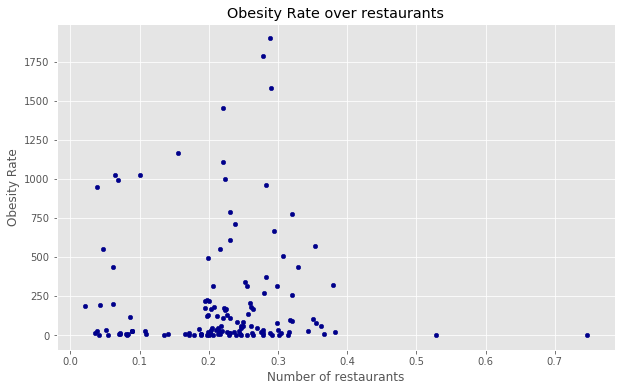

In [245]:
df.plot(kind='scatter', x='Obesity_Rate', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Obesity Rate over restaurants')
plt.xlabel('Number of restaurants')
plt.ylabel('Obesity Rate')

plt.show()

### FOURSQUARE 

In [246]:
client_id = 'LEBUG0WN14Y0RAXTDDLG1DYL3BWN2Z2PXLUKKHFLS3UTTDS0'
client_secret = 'DFIAGKOYNAI2PUOUHMYREL5XRNZN33GYP4ISFOVC5GGXZ3PV'
version = '20180604'
venue_id = '4bf58dd8d48988d16e941735'


In [247]:
country_lat = []
country_long = []
for i,j in enumerate(df.lattitude):
    country_lat.append(df.lattitude[i])
for  i,j in enumerate(df.longitude):
    country_long.append(df.longitude[i])

In [248]:
#country_lat
#country_long

In [249]:
def get_json(lat,long):
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query{}'.format(
    client_id, 
    client_secret, 
    version, 
    lat, 
    long, 
    radius, 
    LIMIT,
    venue_id)
    results = requests.get(url).json()
    return results

In [ ]:
result = []
LIMIT = 100
radius = 50
for i in range(0,140):
    result.append(get_json(country_lat[i],country_long[i])
    